<a href="https://colab.research.google.com/github/AvaniLaad/Mini-Project-BigMart-Sales-Predictive-Analysis/blob/main/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Mart Sales #

## By: Avani Laad ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("C:/Users/HP/Desktop/.ipynb_checkpoints/big mart sales technocolab/Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Basic data exploration ###

In [ ]:
data.shape

(8523, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Cleaning the dataset ###

In [ ]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

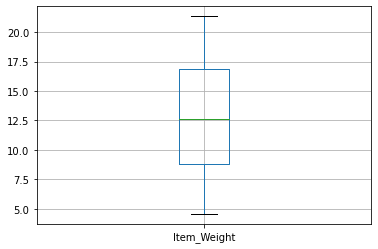

In [ ]:
#checking for outliers in Item_Weight before replacing missing values with mean
data.boxplot(column=['Item_Weight'])
plt.show

In [ ]:
#since there are no outliers, therefore we'll apply mean for numeric missing values
mean_IW=np.mean(data.Item_Weight)
data.Item_Weight=data.Item_Weight.fillna(mean_IW)

In [ ]:
#using mode for categorical missing values
data.Outlet_Size=data.Outlet_Size.fillna("Medium")

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


<AxesSubplot:>

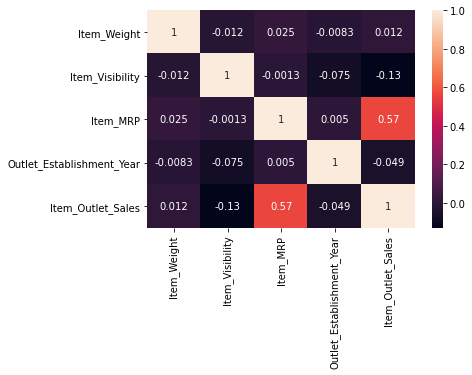

In [ ]:
corr=data.corr()
sns.heatmap(corr, annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

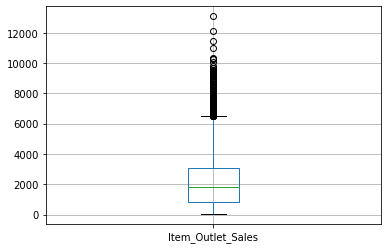

In [ ]:
#checking for outliers in Item_Outlet_Sales
data.boxplot(column=['Item_Outlet_Sales'])
plt.show

#we found some outliers in Item_Outlet_Sales

In [ ]:
#this will return position where data greater than 10,000 is present
print(np.where(data['Item_Outlet_Sales']>10000))

(array([1009, 1450, 4349, 4888, 5223, 6541, 7188, 7191], dtype=int64),)


### Cleaning the data ###

In [ ]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat", inplace=True)
data["Item_Fat_Content"].replace(["reg"],"Regular", inplace=True)
data.value_counts(["Item_Fat_Content"])

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

In [ ]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
data['Outlet_Identifier'].replace(['OUT027'],'27', inplace=True)
data['Outlet_Identifier'].replace(['OUT013'],'13', inplace=True)
data['Outlet_Identifier'].replace(['OUT035'],'35', inplace=True)
data['Outlet_Identifier'].replace(['OUT049'],'49', inplace=True)
data['Outlet_Identifier'].replace(['OUT046'],'46', inplace=True)
data['Outlet_Identifier'].replace(['OUT045'],'45', inplace=True)
data['Outlet_Identifier'].replace(['OUT018'],'18', inplace=True)
data['Outlet_Identifier'].replace(['OUT017'],'17', inplace=True)
data['Outlet_Identifier'].replace(['OUT010'],'10', inplace=True)
data['Outlet_Identifier'].replace(['OUT019'],'19', inplace=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.drop(['Item_Identifier'], axis=1, inplace=True)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Transforming data into numerical values ###

In [ ]:
#converting values to integers for Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

data['Item_Weight']=pd.to_numeric(data['Item_Weight'])
data['Item_Visibility']=pd.to_numeric(data['Item_Visibility'])
data['Item_MRP']=pd.to_numeric(data['Item_MRP'])
data['Outlet_Establishment_Year']=pd.to_numeric(data['Outlet_Establishment_Year'])
data['Item_Outlet_Sales']=pd.to_numeric(data['Item_Outlet_Sales'])
data['Outlet_Identifier']=pd.to_numeric(data['Outlet_Identifier'])

data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from sklearn.preprocessing import LabelEncoder

data['Outlet_Size']=LabelEncoder().fit_transform(data['Outlet_Size'])
data['Item_Fat_Content']=LabelEncoder().fit_transform(data['Item_Fat_Content'])
data['Item_Type']=LabelEncoder().fit_transform(data['Item_Type'])
data['Outlet_Location_Type']=LabelEncoder().fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=LabelEncoder().fit_transform(data['Outlet_Type'])
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.8092,49,1999,1,0,1,3735.1380
1,5.920000,1,0.019278,14,48.2692,18,2009,1,2,2,443.4228
2,17.500000,0,0.016760,10,141.6180,49,1999,1,0,1,2097.2700
3,19.200000,1,0.000000,6,182.0950,10,1998,1,2,0,732.3800
4,8.930000,0,0.000000,9,53.8614,13,1987,0,2,1,994.7052
5,10.395000,1,0.000000,0,51.4008,18,2009,1,2,2,556.6088
6,13.650000,1,0.012741,13,57.6588,13,1987,0,2,1,343.5528
7,12.857645,0,0.127470,13,107.7622,27,1985,1,2,3,4022.7636
8,16.200000,1,0.016687,5,96.9726,45,2002,1,1,1,1076.5986
9,19.200000,1,0.094450,5,187.8214,17,2007,1,1,1,4710.5350


### Splitting the dataset ###

In [ ]:
# split dataset
# xtrain ytrain
# xtest  ytest
Y_train = pd.DataFrame(data = data.iloc[:, 10].values, columns = ['target'])
data= data.drop(["Item_Outlet_Sales"],axis=1)
data.head() 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,49,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,18,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,49,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,10,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,13,1987,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,9.500,1,0.035206,6,171.3448,49,1999,1,0,1
7757,18.000,0,0.047473,9,170.5422,45,2002,1,1,1
764,17.600,1,0.076122,10,111.7202,46,1997,2,0,1
6867,8.325,0,0.029845,6,41.6138,45,2002,1,1,1
2716,12.850,0,0.137228,13,155.5630,46,1997,2,0,1


In [ ]:
# normalising the data

from sklearn.preprocessing import MinMaxScaler
data_scaler=MinMaxScaler()
X_train=data_scaler.fit_transform(X_train)
X_test=data_scaler.fit_transform(X_test)

In [ ]:
# evalution metrics

from sklearn import metrics
def PrintError(X_test,y_test,model_name):
    prediction=model_name.predict(X_test)
    print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,prediction))
    print("Mean Squared Error: ",metrics.mean_squared_error(y_test,prediction))
    print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [ ]:
# Linear regression

from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
PrintError(X_test,y_test,linear_regression)
linear_regression.score(X_test,y_test)

Mean Absolute Error:  849.8850711249573
Mean Squared Error:  1281644.8791612184
Root Mean Square Error:  1132.0975572631621


0.528455116227021

In [ ]:
# decision tree regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(max_depth=5,random_state=42)
decision_tree.fit(X_train,y_train)
PrintError(X_test,y_test,decision_tree)

decision_tree.score(X_test,y_test)

Mean Absolute Error:  722.9186208573241
Mean Squared Error:  1059819.1212507132
Root Mean Square Error:  1029.4751678650211


0.610069612514182

In [ ]:
# random forest regressor

from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=5
min_samples_split=25
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
random_forest.fit(X_train,y_train)
PrintError(X_test,y_test,random_forest)
random_forest.score(X_test,y_test)

<ipython-input-35-45580faef857>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error:  715.281367480715
Mean Squared Error:  1041756.1850586116
Root Mean Square Error:  1020.6645800940736


0.6167153575920834

### Observation- random forest is the best model ###

In [ ]:
# saving the model

import joblib
joblib.dump(random_forest,"randomforest_BigMartprediction.pkl")

['randomforest_BigMartprediction.pkl']

## TEST MODEL ##

In [ ]:
# import the testing model

data_test=pd.read_csv("C:/Users/HP/Desktop/.ipynb_checkpoints/big mart sales technocolab/Test.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data_test.shape

(5681, 11)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
random_forest_from_joblib = joblib.load("randomforest_BigMartprediction.pkl")

In [ ]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

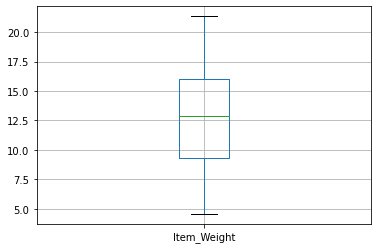

In [ ]:
#checking for outliers in Item_Weight before replacing missing values with mean
data.boxplot(column=['Item_Weight'])
plt.show

In [ ]:
#since there are no outliers, therefore we'll apply mean for numeric missing values
mean_IW=np.mean(data_test.Item_Weight)
data_test.Item_Weight=data_test.Item_Weight.fillna(mean_IW)

In [ ]:
#using mode for categorical missing values
data_test.Outlet_Size=data_test.Outlet_Size.fillna("Medium")

In [ ]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
data_test["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat", inplace=True)
data_test["Item_Fat_Content"].replace(["reg"],"Regular", inplace=True)
data_test.value_counts(["Item_Fat_Content"])

Item_Fat_Content
Low Fat             3668
Regular             2013
dtype: int64

In [ ]:
data_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [ ]:
data_test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT035    620
OUT049    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [ ]:
data_test['Outlet_Identifier'].replace(['OUT027'],'27', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT013'],'13', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT046'],'46', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT049'],'49', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT035'],'35', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT045'],'45', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT018'],'18', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT017'],'17', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT010'],'10', inplace=True)
data_test['Outlet_Identifier'].replace(['OUT019'],'19', inplace=True)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,49,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,18,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,49,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,10,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,13,1987,0,2,1


In [ ]:
data_test.drop(['Item_Identifier'], axis=1, inplace=True)
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,49,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,17,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,10,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,17,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,27,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#converting values to integers for Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

data_test['Item_Weight']=pd.to_numeric(data_test['Item_Weight'])
data_test['Item_Visibility']=pd.to_numeric(data_test['Item_Visibility'])
data_test['Item_MRP']=pd.to_numeric(data_test['Item_MRP'])
data_test['Outlet_Establishment_Year']=pd.to_numeric(data_test['Outlet_Establishment_Year'])
data_test['Outlet_Identifier']=pd.to_numeric(data_test['Outlet_Identifier'])

data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,49,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,17,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,10,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,17,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,27,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_test['Outlet_Size']=LabelEncoder().fit_transform(data_test['Outlet_Size'])
data_test['Item_Fat_Content']=LabelEncoder().fit_transform(data_test['Item_Fat_Content'])
data_test['Item_Type']=LabelEncoder().fit_transform(data_test['Item_Type'])
data_test['Outlet_Location_Type']=LabelEncoder().fit_transform(data_test['Outlet_Location_Type'])
data_test['Outlet_Type']=LabelEncoder().fit_transform(data_test['Outlet_Type'])
data_test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,49,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,17,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,10,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,17,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,27,1985,1,2,3
5,9.800000,1,0.063817,6,117.1492,46,1997,2,0,1
6,19.350000,1,0.082602,0,50.1034,18,2009,1,2,2
7,12.695633,0,0.015782,0,81.0592,27,1985,1,2,3
8,6.305000,1,0.123365,13,95.7436,45,2002,1,1,1
9,5.985000,0,0.005698,0,186.8924,17,2007,1,1,1


In [ ]:
prediction=random_forest.predict(data_test)

In [ ]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5681 non-null   float64
dtypes: float64(1)
memory usage: 44.5 KB


In [ ]:
prediction=prediction.rename(columns={0:"Item_Outlet_Sales"})
prediction.head(10)

,Item_Outlet_Sales
0,5198.563582
1,5261.856091
2,586.967778
3,5198.563582
4,5176.828251
5,5192.253681
6,5122.256746
7,5152.398622
8,5176.828251
9,5152.398622


In [ ]:
prediction.to_csv("PredictedBigMart.csv")